Smote technique to optimize imbalanced data set

· Baseline classification model – logistic regression & K-nearest

· XG-Boost model – tune parameters via grid search

· Lean into imbalance data set thing and anomaly detection

Anomaly detection ideas:

- Auto encoder
- DB scan


· Maybe correlate time feature

In [1]:
# pip install opendatasets

import opendatasets as od
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split

# %matplotlib
pd.set_option('display.max_columns', None)

### Load Data 

- retreived from kaggle portal
- File too large to store in github

In [2]:
dataset_url="https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data"

od.download(dataset_url)

Skipping, found downloaded files in "./creditcardfraud" (use force=True to force download)


In [3]:
data_dir = "creditcardfraud"

os.listdir(data_dir)

['creditcard.csv']

In [4]:
creditcard=data_dir + "/creditcard.csv"
data = pd.read_csv(creditcard)

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
prop = 492/ 284315
round(prop, 3)

0.002

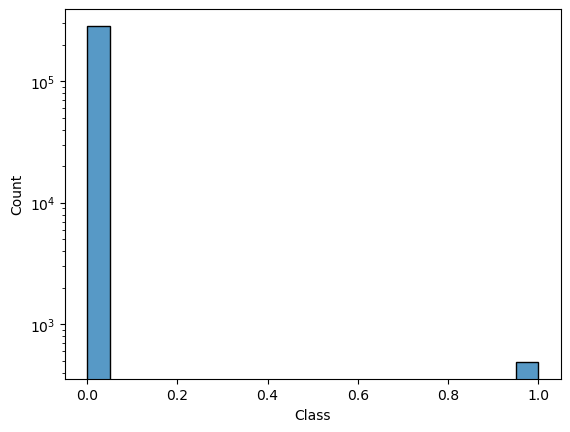

In [8]:
#data imbalance
sns.histplot(data['Class'])
plt.yscale('log')
plt.show()


In [9]:
data.groupby('Class')['Amount'].sum()

Class
0    25102462.04
1       60127.97
Name: Amount, dtype: float64

<Axes: xlabel='Amount', ylabel='Class'>

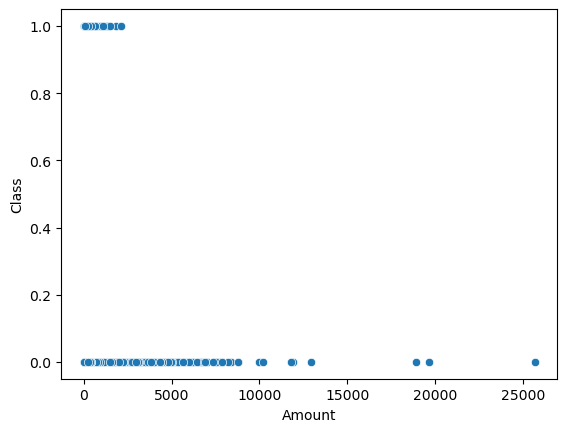

In [10]:
amountClass = data[["Amount", "Class"]]
sns.scatterplot(amountClass, x = "Amount", y= "Class")

In [11]:
amountClass[amountClass.Class==1].Amount.max()

2125.87

In [12]:
amountClass[amountClass.Class==0].Amount

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284315, dtype: float64

/Users/yuhanburgess/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


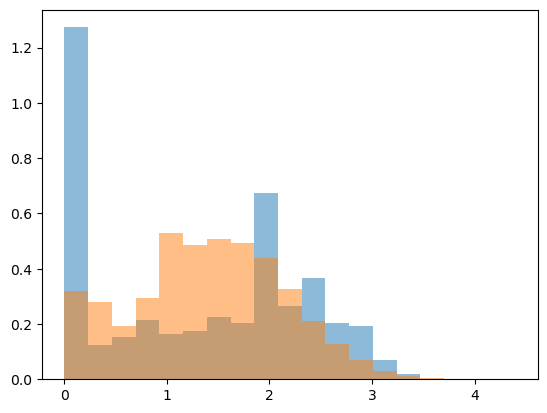

In [13]:
bins = np.linspace(0,np.log10(25000),20)
plt.hist(np.log10(amountClass[amountClass.Class==1].Amount), bins=bins, density=True, alpha=0.5)
plt.hist(np.log10(amountClass[amountClass.Class==0].Amount), bins=bins, density=True, alpha=0.5)
plt.show()

Bringing Amount and Time into the same scale as the rest of the column as not in give a single feature dominance over the other. 

May want to use log normalization

Robust Scalar: we can remove the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset

In [14]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Assuming 'data' is your pandas DataFrame and 'column_to_exclude' is the column you want to exclude
column_to_exclude = 'Class'

# Drop the column to exclude
data_to_scale = data.drop(columns=[column_to_exclude])

# Apply RobustScaler to the remaining columns
rob_scaler = RobustScaler()
scaled_data = rob_scaler.fit_transform(data_to_scale)

# Convert the scaled data back to a DataFrame
data_scaled = pd.DataFrame(scaled_data, columns=data_to_scale.columns)

# Concatenate the excluded column with the scaled DataFrame
data_scaled[column_to_exclude] = data[column_to_exclude]

# Now you can view the head of the scaled DataFrame
data_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-0.616237,-0.098602,1.228905,0.878152,-0.217859,0.631245,0.177406,0.142432,0.334787,0.185689,-0.345414,-0.740209,-0.745834,-0.393775,1.152959,-0.541507,0.309758,0.029437,0.437322,0.910463,0.026866,0.253109,-0.320791,0.032681,0.167619,-0.241182,0.816731,-0.246091,1.783274,0
1,-0.994983,0.524929,0.143100,-0.006970,0.293974,0.087726,0.164395,-0.105740,0.117064,-0.164482,-0.074854,1.095465,0.903686,0.383407,-0.211569,0.476970,0.400979,-0.055612,-0.179787,-0.163363,-0.019150,-0.473332,-0.602719,0.363442,-0.479557,0.225462,0.313475,-0.063781,0.026519,-0.269825,0
2,-0.994972,-0.615587,-1.002407,0.830932,0.251024,-0.344345,1.778007,0.668164,0.420388,-1.179796,0.303796,0.437564,-0.072229,0.557465,-0.235704,1.865539,-2.982344,1.330783,-0.117763,-2.475385,1.703959,0.668917,0.714254,2.974603,-0.919589,-0.515430,-0.153111,-0.350218,-0.540962,4.983721,0
3,-0.994972,-0.440239,-0.178789,0.841250,-0.529808,0.033775,1.303832,0.175637,0.662489,-1.076888,0.038374,-0.128974,0.037307,0.397641,-0.368473,-0.551666,-1.135905,-0.700023,1.970088,-1.350843,-0.422194,-0.190105,-0.001408,-0.578786,-1.531963,0.944482,-0.298959,0.379163,0.382611,1.418291,0
4,-0.994960,-0.526089,0.579239,0.713861,0.265632,-0.270695,0.317183,0.491625,-0.546463,0.700808,0.855099,-0.525992,0.388903,1.036898,-1.273801,0.103149,-0.522390,-0.193970,-0.034570,0.873809,1.366227,0.048266,0.739092,-0.407980,0.126293,-0.333308,0.976221,1.347133,1.553716,0.670579,0


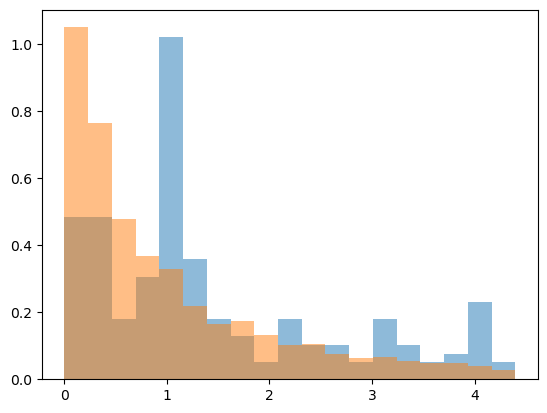

In [15]:
bins = np.linspace(0,np.log10(25000),20)
plt.hist(data_scaled[data_scaled.Class==1].Amount, bins=bins, density=True, alpha=0.5)
plt.hist(data_scaled[data_scaled.Class==0].Amount, bins=bins, density=True, alpha=0.5)
plt.show()

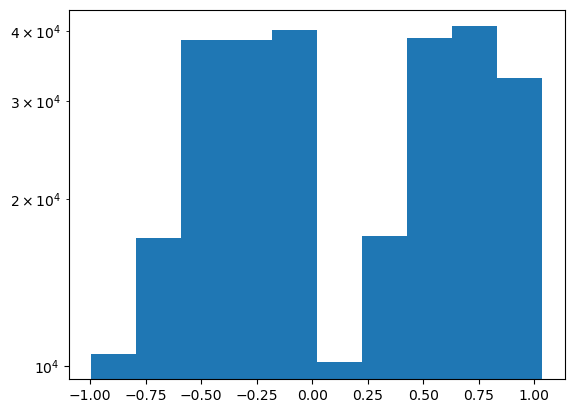

In [16]:
plt.hist(data_scaled.Time)
plt.yscale('log')

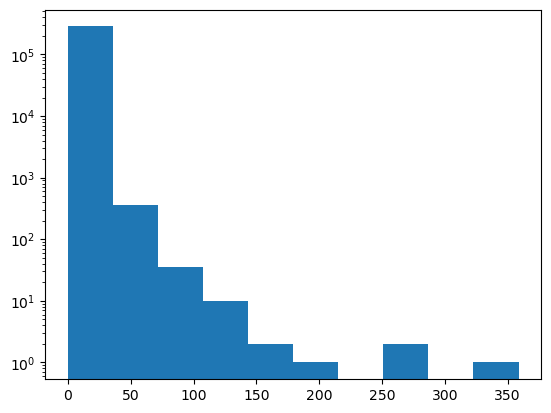

In [17]:
plt.hist(data_scaled.Amount)
plt.yscale('log')

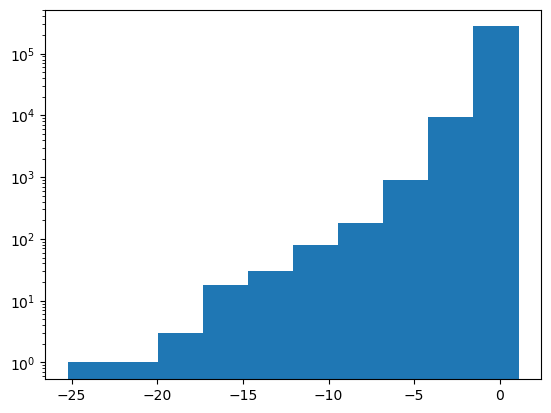

In [18]:
plt.hist(data_scaled.V1)
plt.yscale("log")

In [19]:
# # in our case we may want to have detecting fraud as TP for confusion Matrix, this will allow that to happen
data_scaled["Class"] = data_scaled["Class"].apply(lambda x: 1 if x == 0 else 0)

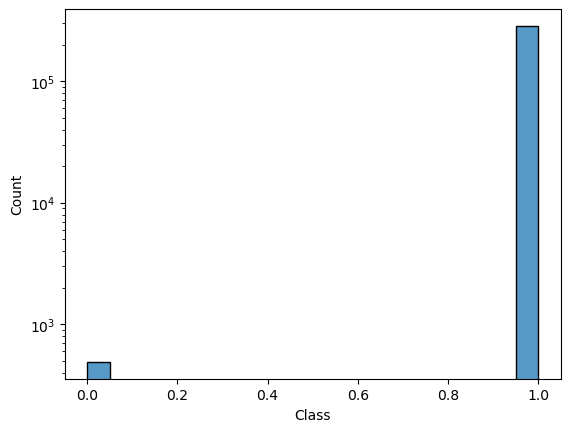

In [20]:
#data imbalance
sns.histplot(data_scaled['Class'])
plt.yscale('log')
plt.show()

In [21]:
X = data_scaled.drop('Class', axis=1)
y = data_scaled['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
y

0         1
1         1
2         1
3         1
4         1
         ..
284802    1
284803    1
284804    1
284805    1
284806    1
Name: Class, Length: 284807, dtype: int64

In [23]:
y_train.value_counts()

1    227451
0       394
Name: Class, dtype: int64

In [24]:
y_test.value_counts()

1    56864
0       98
Name: Class, dtype: int64

In [25]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_train type:", type(X_train))
print("y_train type:", type(y_train))

X_train shape: (227845, 30)
y_train shape: (227845,)
X_train type: <class 'pandas.core.frame.DataFrame'>
y_train type: <class 'pandas.core.series.Series'>


# Confusion Matrix Overview

TP  FN 

FP  TN

*TP:* Transaction is truly fraud

*FP:* Transcation flagged as fraud when it actually wasn't

*TN:* Transaction was not flagged for fraud and it is not a fradulent transaction

*FN:* Transaction was not flagged for fraud but it is fraulent

# Supervised Learning Model

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
def report(y_test, mod):
    # Evaluate performance using classification report
    print(classification_report(y_test, mod))

    # Evaluate performance using confusion matrix
    print(confusion_matrix(y_test, mod))

    

True:    284315

Fraudulent:       492

# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
lgm = LogisticRegression()

# Train the classifier
lgm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgm.predict(X_test)
# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.57      0.69        98
           1       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962

[[   56    42]
 [    9 56855]]


## SMOTE

SMOTE(*, 

*sampling_strategy*= float (only for binary), str (in our casue will use either auto or minority), dict or callable, default=’auto’,  

*random_state*= controls randomization, 

*k_neighbors*= define the neighborhood of samples
)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# lgm = LogisticRegression()

# param_grid = {
#     'C': [0.01, 0.1, 1],
#     "penalty": ['l2', "l2", "elasticnet"]
# }

# grid_search = GridSearchCV(estimator=lgm, param_grid=param_grid, cv=3, scoring='recall')
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Evaluate the model with the best hyperparameters on the test set
# model = LogisticRegression(**best_params)
# model.fit(X_train, y_train)
# recall = model.score(X_test, y_test)
# print("Test Recall with Best Hyperparameters:", recall)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'verbose': 0}

Test Recall with Best Hyperparameters: 0.9990695551420246

In [29]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### baseline

In [30]:
lgm = LogisticRegression()

# Train the classifier
lgm.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = lgm.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.06      0.92      0.11        98
           1       1.00      0.97      0.99     56864

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

[[   90     8]
 [ 1432 55432]]


### fine tuned

In [31]:

# Initialize the KNN classifier
lgm = LogisticRegression(C=0.01, penalty="l2")

# Train the classifier
lgm.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = lgm.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.06      0.92      0.11        98
           1       1.00      0.98      0.99     56864

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

[[   90     8]
 [ 1398 55466]]


### Adjusted Threshold

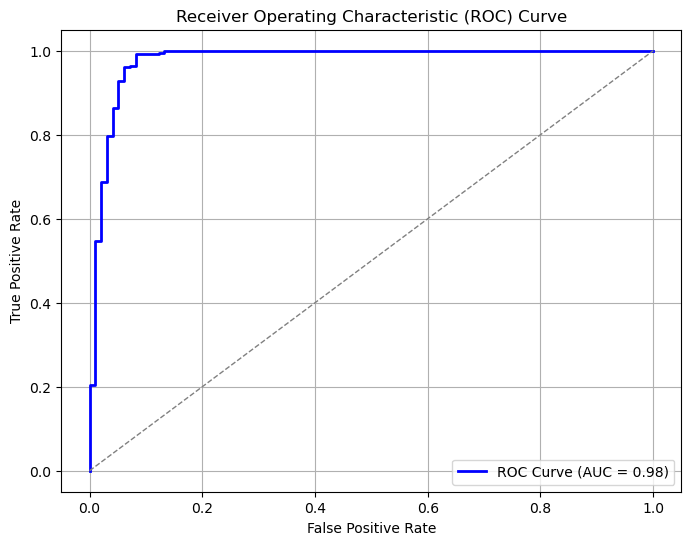

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the positive class (fraud)
y_probs = lgm.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [37]:
# Initialize the KNN classifier
lgm = LogisticRegression(C=0.01, penalty="l2")

# Train the classifier
lgm.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_proba = lgm.predict_proba(X_test)[:, 1]  # Probability of class 0 (fraud)
y_pred = (y_pred_proba > 0.95).astype(int)  # Applying the threshold

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.98      0.01        98
           1       1.00      0.65      0.79     56864

    accuracy                           0.65     56962
   macro avg       0.50      0.82      0.40     56962
weighted avg       1.00      0.65      0.79     56962

[[   96     2]
 [19802 37062]]


### ROC curve

## boarderlineSMOTE

In [39]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import classification_report, confusion_matrix

# Apply SMOTE for oversampling
borderline = BorderlineSMOTE(random_state=42)
X_train_resampled, y_train_resampled = borderline.fit_resample(X_train, y_train)

### baseline

In [40]:
from imblearn.over_sampling import BorderlineSMOTE

boarderline = BorderlineSMOTE(random_state=42, kind= 'borderline-2')
X_train_resampled, y_train_resampled = boarderline.fit_resample(X_train, y_train)

In [41]:
lgm = LogisticRegression()

# Train the classifier
lgm.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = lgm.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.18      0.87      0.30        98
           1       1.00      0.99      1.00     56864

    accuracy                           0.99     56962
   macro avg       0.59      0.93      0.65     56962
weighted avg       1.00      0.99      1.00     56962

[[   85    13]
 [  383 56481]]


### fine tuned

In [43]:

# Initialize the KNN classifier
lgm = LogisticRegression(C=0.01, penalty="l2")

# Train the classifier
lgm.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = lgm.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.17      0.87      0.28        98
           1       1.00      0.99      1.00     56864

    accuracy                           0.99     56962
   macro avg       0.58      0.93      0.64     56962
weighted avg       1.00      0.99      0.99     56962

[[   85    13]
 [  423 56441]]


### Adjusted Threshold

In [44]:
# Initialize the KNN classifier
lgm = LogisticRegression(C=0.01, penalty="l2")

# Train the classifier
lgm.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_proba = lgm.predict_proba(X_test)[:, 1]  # Probability of class 0 (fraud)
y_pred = (y_pred_proba > 0.95).astype(int)  # Applying the threshold

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.04      0.89      0.08        98
           1       1.00      0.96      0.98     56864

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.96      0.98     56962

[[   87    11]
 [ 2105 54759]]


# ADASYN

### Baseline

In [45]:
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Apply SMOTE for oversampling
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

In [46]:
lgm = LogisticRegression()

# Train the classifier
lgm.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = lgm.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.02      0.94      0.04        98
           1       1.00      0.92      0.96     56864

    accuracy                           0.92     56962
   macro avg       0.51      0.93      0.50     56962
weighted avg       1.00      0.92      0.96     56962

[[   92     6]
 [ 4529 52335]]


In [53]:
# from imblearn.over_sampling import ADASYN
# from imblearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression

# # Define the pipeline with ADASYN and model
# pipeline = Pipeline([
#     ('sampling', ADASYN(random_state=42)),
#     ('model', LogisticRegression())
# ])

# # Define parameter grid for grid search
# param_grid = {
#     'model__C': [0.01, 0.1, 1],  
#     'sampling__n_neighbors': [3, 5], 
#     'model__penalty': ["l1", "l2", "elasticnet"]  
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Print the best parameters
# print("Best Parameters:", grid_search.best_params_)


/Users/yuhanburgess/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yuhanburgess/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits fa

Best Parameters: {'model__C': 0.01, 'model__penalty': 'l2', 'sampling__n_neighbors': 5}


Best Parameters: {'model__C': 0.01, 'model__penalty': 'l2', 'sampling__n_neighbors': 5}

If it takes you too long to run the code above then run code below

[[   85    13]

 [   67 56797]]

In [52]:
adasyn = ADASYN(random_state=42, n_neighbors=5)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)
lgm = LogisticRegression(C=0.01, penalty="l2")

# Train the classifier
lgm.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = lgm.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.02      0.94      0.04        98
           1       1.00      0.92      0.96     56864

    accuracy                           0.92     56962
   macro avg       0.51      0.93      0.50     56962
weighted avg       1.00      0.92      0.96     56962

[[   92     6]
 [ 4491 52373]]


In [54]:
# Define and initialize ADASYN with the best n_neighbors
# best_n_neighbors = grid_search.best_params_['sampling__n_neighbors']
# adasyn = ADASYN(random_state=42, n_neighbors= 5)

# Resample the training data using ADASYN
# X_train_resampled_ADASYN, y_train_resampled_ADASYN = adasyn.fit_resample(X_train, y_train)

adasyn_knn = pd.concat([pd.DataFrame(X_train_resampled, columns=X_train.columns), pd.Series(y_train_resampled, name='target')], axis=1)

# Anomoly Detection

## DBSCAN

*all the anomoly are the same in each file thought it might be easier not to have to switch between the three*
**may not be best for high dimensional datasets**

- eps = distance between two samples
- min_samples = minimal sample in neigbhorhood

<Axes: xlabel='Time', ylabel='Count'>

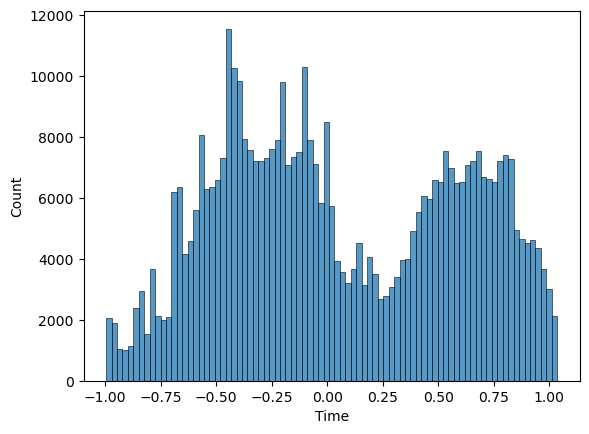

In [55]:
sns.histplot(adasyn_knn["Time"])

### PCA Test

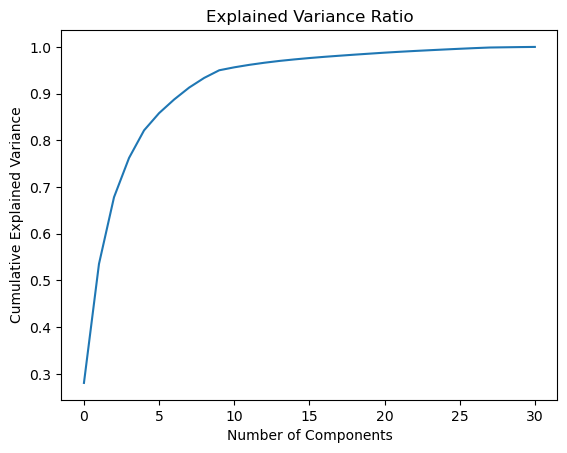

In [56]:
from sklearn.decomposition import PCA
pca = PCA()

# Fit PCA model to data
pca.fit(adasyn_knn)

# Plot explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

In [57]:
adasyn_knn.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,target
0,0.689153,0.866243,-0.318246,-0.258067,0.219853,-0.349083,0.161107,-0.594108,0.025441,0.891756,0.063149,0.437893,1.515383,0.968204,-0.330750,-0.308326,0.242945,-0.979336,0.655527,0.179461,-0.182470,0.645288,0.897861,0.208088,-0.402433,-0.092224,-0.289894,0.270724,-0.444900,-0.167819,1
1,0.381595,-0.187425,-0.493790,0.717314,-1.254993,-0.040991,0.379221,-0.019692,-0.791038,0.074024,0.711612,-1.273103,-0.846476,0.819542,-1.353996,0.473313,-0.228517,-1.771255,2.111227,-1.853612,-1.183107,-0.299044,0.387449,0.402712,-1.316024,-1.786733,0.729066,-2.296765,-1.188935,0.333962,1
2,0.762145,0.024329,0.538468,-0.386531,-0.433454,0.870514,-0.073053,0.664959,0.177093,-0.064380,-0.551175,0.369278,-0.207852,-0.758684,-0.751967,-0.690114,0.617066,0.124572,0.525736,0.213098,0.216694,-0.687578,-0.821494,0.305614,0.134996,-0.670877,0.302549,1.266659,0.449894,-0.139873,1
3,0.105476,-0.247384,0.676830,0.819183,1.752053,0.425328,1.093924,0.718356,-0.193443,0.341070,0.660548,-0.547691,-4.219203,0.229161,1.328640,-0.860367,1.404358,-0.619844,0.818848,-2.350028,-0.554807,0.224160,0.407738,-0.198912,0.512794,-1.005893,-0.226961,-0.582855,-0.580429,1.333613,1
4,-0.023931,-1.809043,1.306368,-0.317921,-0.006109,-0.614807,-0.176730,-0.423059,2.409441,0.473678,1.328816,0.336454,1.422038,0.603466,0.149211,-0.900094,0.077591,0.083175,-0.052198,0.774610,0.145495,-1.087925,-0.221450,0.846268,0.032014,0.680072,0.523781,1.763981,-2.544321,0.052540,1


In [69]:
adasyn_knn_sampled = adasyn_knn.sample(n=1000, random_state=42)
# Assuming adasyn_knn_sampled contains the features and binary labels
# Separate features and labels
X = adasyn_knn_sampled.drop(columns=['target'])  # Features
y = adasyn_knn_sampled['target']  # Binary labels

# Initialize PCA with desired number of components
pca = PCA(n_components=10)

# Fit PCA to the features
pca.fit(X)

# Transform the features to their principal components
transformed_data = pca.transform(X)

# Print the shape of original data and transformed data
print("Original data shape:", X.shape)
print("Transformed data shape:", transformed_data.shape)

Original data shape: (1000, 30)
Transformed data shape: (1000, 10)


In [70]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps= 3.5, min_samples=15)
clusters = dbscan.fit_predict(transformed_data)

# Identify the core samples
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Label -1 is considered as noise by the DBSCAN algorithm
# So, anomalies are the data points not part of any clusters (noise)
anomalies = transformed_data[clusters == -1]

print('Number of anomalies detected:', len(anomalies))

Number of anomalies detected: 271


In [71]:
adasyn_knn_sampled['target'].value_counts()

0    508
1    492
Name: target, dtype: int64

In [72]:
adasyn_knn_sampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,target
141117,0.807904,0.924675,0.069193,-1.014831,0.251106,0.426988,-0.441014,0.134059,-0.477555,0.433413,-0.291838,-0.435346,0.019802,0.173907,-1.010917,0.125953,0.292392,0.538059,-0.268163,0.117081,-0.232354,-0.829147,-0.906047,1.066319,0.429803,-0.373987,0.410349,-0.392150,-0.327487,-0.279746,1
330237,0.737960,0.186147,-0.106729,-0.860811,-0.010645,0.505334,-0.468667,0.998586,-0.582242,0.426946,-1.473515,-0.414332,0.245478,0.533226,-2.150642,-0.415711,-0.015680,1.296070,0.368375,-0.041760,1.301929,0.035357,-0.225424,0.793153,0.126435,-0.332166,-0.502000,0.046468,0.571177,2.732120,0
368526,0.166578,0.350388,-0.374922,-1.339315,3.041557,0.549584,-0.282393,1.158871,-0.986094,-0.137410,-0.218872,0.400258,-2.596748,1.676286,-1.403520,-1.129254,1.531352,2.440138,0.778394,-2.325864,3.026749,-0.087124,-1.118898,-1.029134,-0.487375,-0.398579,-0.377235,-0.883475,0.743674,7.908394,0
394542,0.555799,-0.138332,0.717663,-1.635765,-0.140571,0.321932,-0.284885,3.440892,-1.750989,-0.524881,-2.147550,-0.296697,-0.779597,0.139240,-2.627887,-0.045756,0.073098,2.066634,1.071713,-0.415492,0.148071,0.329978,0.493194,-1.264154,-1.131655,2.018720,-0.174483,-0.019305,-1.414355,6.303271,0
319574,-0.447782,-0.194086,-0.415654,-0.006725,1.051256,0.105668,0.182435,0.223265,-0.113079,0.518111,-0.322568,-0.653395,-0.771289,-0.967209,-1.048037,0.278504,-0.129785,1.015190,0.078272,0.364703,-1.282514,-0.787765,-0.445808,0.715668,-0.600686,0.539665,-0.512765,0.311863,1.239800,1.709517,0


### Silhouette Score

- measure similarity between observation to its own cluster compared to other clusters
- ranges from -1 to 1
- ≈ 1 : well matched to its own cluster and poorly matched to neighboring 

In [73]:
from sklearn.metrics import silhouette_score
silhouette_score(transformed_data, clusters)

0.5005452514742251

### Adjusted Rand

- similarity between two clusterings
- ≈ 0 : random cluster assignment
- ≈ 1 precect similarity between true and predicted cluster

In [74]:
from sklearn.metrics import adjusted_rand_score

true_labels = adasyn_knn_sampled['target']
adjusted_rand_score(true_labels, clusters)


0.10552059057453389

### Calinski_harabasz_score and Davies_bouldin_score

- CH meanures ration between cluster dispersion to within-cluster dispersion
- high value = better-defined, more separate clusters

- DB evalutes avg similarites between each cluster and its more similar cluster, given cluster size
- lower value = better clustering (0 = perfectly separated clusters)

In [64]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Calinski-Harabasz Index
ch_score = calinski_harabasz_score(transformed_data, clusters)
print("Calinski-Harabasz Index:", ch_score)

# Davies-Bouldin Index
db_score = davies_bouldin_score(transformed_data, clusters)
print("Davies-Bouldin Index:", db_score)


Calinski-Harabasz Index: 146.2499667874663
Davies-Bouldin Index: 1.9783743445383741


### Cluster Stability 

- assesses the robustness of clustering results by measuring how stable the clusters are under perturbations of the data
- helps to determin how robust clustering algorithm is against variations 
- ≈ 0 : stability between the cluster assignments across different bootstrap sample varies a lot

In [75]:
from sklearn.metrics import adjusted_rand_score
import numpy as np
num_bootstraps = 100
cluster_assignments = np.zeros((len(adasyn_knn_sampled), num_bootstraps))

# Generate bootstrap samples and perform clustering
for i in range(num_bootstraps):
    # Generate a bootstrap sample
    bootstrap_sample = adasyn_knn_sampled.sample(n=len(adasyn_knn_sampled), replace=True, random_state=i)
    
    # Fit DBSCAN to the bootstrap sample
    clusters = dbscan.fit_predict(bootstrap_sample)
    
    # Store cluster assignments
    cluster_assignments[:, i] = clusters

# Compute Adjusted Rand Index between cluster assignments
ari_scores = np.zeros((num_bootstraps, num_bootstraps))
for i in range(num_bootstraps):
    for j in range(num_bootstraps):
        ari_scores[i, j] = adjusted_rand_score(cluster_assignments[:, i], cluster_assignments[:, j])


# Compute stability score
stability_score = np.mean(ari_scores)

print("Stability Score (Adjusted Rand Index):", stability_score)


Stability Score (Adjusted Rand Index): 0.009963611651843333
